# NASA Data Exploration


In [1]:
raw_data_dir = '../data/raw'
processed_data_dir = '../data/processed'
figsize_width = 12
figsize_height = 8
output_dpi = 72

In [2]:
# Imports
import os
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [3]:
# Load Data
nasa_temp_file = os.path.join(raw_data_dir, 'nasa_temperature_anomaly.txt')
nasa_sea_file = os.path.join(raw_data_dir, 'nasa_sea_level.txt')
nasa_co2_file = os.path.join(raw_data_dir, 'nasa_carbon_dioxide_levels.txt')

In [4]:
# Variable Setup
default_fig_size = (figsize_width, figsize_height)

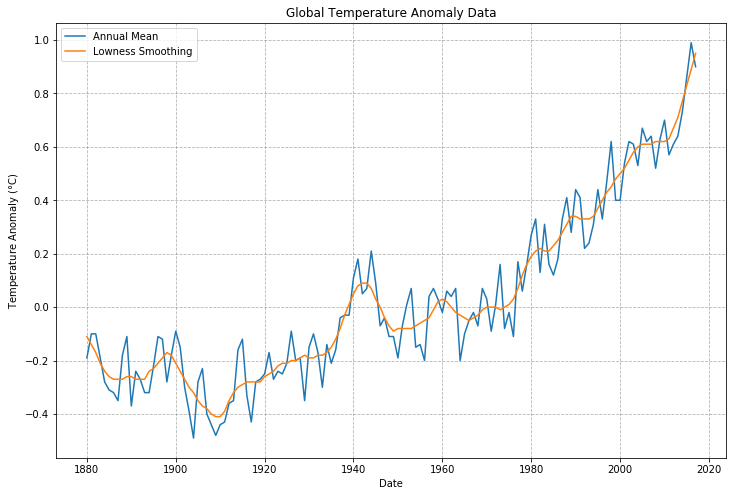

In [5]:
# - Process temperature data
temp_data = pd.read_csv(nasa_temp_file, sep='\t', header=None)
temp_data.columns = ['Year', 'Annual Mean', 'Lowness Smoothing']
temp_data.set_index('Year', inplace=True)

fig, ax = plt.subplots(figsize=default_fig_size)

temp_data.plot(ax=ax)
ax.grid(True, linestyle='--', color='grey', alpha=0.6)

ax.set_title('Global Temperature Anomaly Data')
ax.set_ylabel('Temperature Anomaly ($\degree$C)')
ax.set_xlabel('Date')
ax.legend()

plt.show();

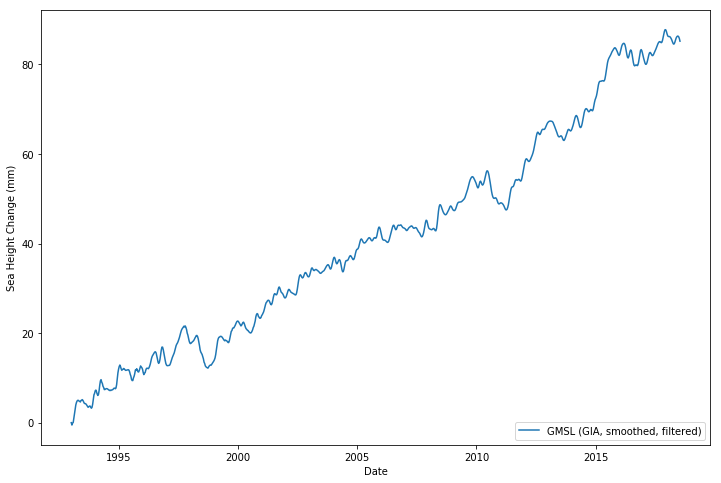

In [6]:
# - Process Sea-level File
# -- Figure out header rows
with open(nasa_sea_file, 'r') as fin:
    all_lines = fin.readlines()
    
header_lines = np.array([1 for x in all_lines if x.startswith('HDR')]).sum()
sea_level_data = pd.read_csv(nasa_sea_file, delim_whitespace=True, 
                             skiprows=header_lines-1).reset_index()

sea_level_data.columns = ['Altimeter Type', 'File Cycle', 'Year Fraction', 
                          'N Observations', 'N Weighted Observations', 'GMSL',
                          'Std GMSL', 'GMSL (smoothed)', 'GMSL (GIA Applied)',
                          'Std GMSL (GIA Applied)', 'GMSL (GIA, smoothed)',
                          'GMSL (GIA, smoothed, filtered)']
sea_level_data.set_index('Year Fraction', inplace=True)

fig, ax = plt.subplots(figsize=default_fig_size)

sea_level_var = sea_level_data.loc[:, 'GMSL (GIA, smoothed, filtered)'] \
                - sea_level_data.loc[:, 'GMSL (GIA, smoothed, filtered)'].iloc[0]

sea_level_var.plot(ax=ax)
ax.set_ylabel('Sea Height Change (mm)')
ax.set_xlabel('Date')
ax.legend(loc='lower right')

plt.show();

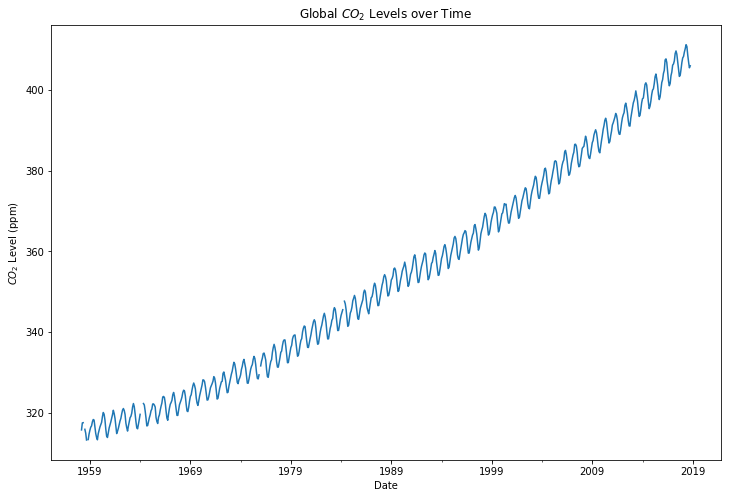

In [7]:
# - Process Carbon Dioxide Data
with open(nasa_co2_file, 'r') as fin:
    all_lines = fin.readlines()

header_lines = np.array([1 for x in all_lines if x.startswith('#')]).sum()

co2_data = pd.read_csv(nasa_co2_file, skiprows=header_lines, header=None, 
                       delim_whitespace=True)
co2_data[co2_data == -99.99] = np.nan

co2_data.columns = ['Year', 'Month', 'Year Fraction', 'Average', 'Interpolated', 
                    'Trend', 'N Days']

co2_data.set_index(['Year', 'Month'], inplace=True)
new_idx = [datetime(x[0], x[1], 1) for x in co2_data.index]
co2_data.index = new_idx
co2_data.index.name = 'Date'

# - Plot
fig, ax = plt.subplots(figsize=default_fig_size)

co2_data.loc[:, 'Average'].plot(ax=ax)

ax.set_ylabel('$CO_{2}$ Level (ppm)')
ax.set_xlabel('Date')
ax.set_title('Global $CO_{2}$ Levels over Time')

plt.show();